# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [3]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [75]:
from sklearn.metrics import classification_report

In [4]:
# Your code here
df=pd.read_csv('data_all.zip')

In [51]:
df.head(50)

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df.shape
data=df.values

In [9]:
import matplotlib.pyplot as plt 
%matplotlib inline

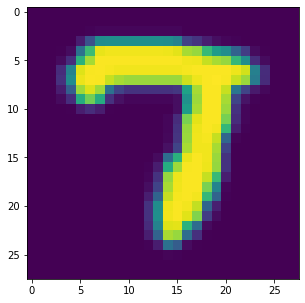

In [57]:
plt.figure(figsize=(5,5))
plt.imshow(data[60,1:].reshape(28,28))  
plt.show()

In [ ]:
alfabeto={0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9',
          10:'A', 11:'B', 12:'C', 13:'D', 14:'E', 15:'F', 16:'G', 17:'H', 18:'I', 19:'J',
          20:'K', 21:'L', 22:'M', 23:'N', 24:'O', 25:'P', 26:'Q', 27:'R', 28:'S', 29:'T',
          30:'U', 31:'V', 32:'W', 33:'X', 34:'Y', 35:'Z',
          36:'a', 37:'b', 38:'c', 39:'d', 40:'e', 41:'f', 42:'g', 43:'h', 44:'i', 45:'j',
          46:'k', 47:'l', 48:'m', 49:'n', 50:'o', 51:'p', 52:'q', 53:'r', 54:'s', 55:'t',
          56:'u', 57:'v', 58:'w', 59:'x', 60:'y', 61:'z'}

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

# RANDOM FOREST CLASSIFIER

In [60]:
# Your code here
upper=df.loc[(df.e>=10) & (df.e<36)]
upper.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
upper_data=upper.values
upper_data.shape

(31345, 785)

In [69]:
X=upper_data/255
upper_data.shape

(31345, 785)

In [70]:
y=upper_data[:,0]

In [72]:
X_train, X_test, y_train, y_test=tts(X, y, test_size=0.2)
X_train.shape

(25076, 785)

In [73]:
rf=RandomForestClassifier(n_estimators=1000, max_depth=5).fit(X_train, y_train)

In [76]:
classification_report(y_test, rf.predict(X_test))
#accuracy .66

C:\Users\danie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n        10.0       0.74      0.73      0.74       215\n        11.0       0.00      0.00      0.00       147\n        12.0       0.60      0.89      0.72       342\n        13.0       1.00      0.09      0.16       174\n        14.0       0.90      0.29      0.44       155\n        15.0       0.74      0.60      0.67       283\n        16.0       0.00      0.00      0.00        96\n        17.0       0.00      0.00      0.00       113\n        18.0       0.56      0.92      0.69       409\n        19.0       0.00      0.00      0.00       113\n        20.0       0.00      0.00      0.00        83\n        21.0       0.86      0.24      0.38       175\n        22.0       0.77      0.94      0.85       286\n        23.0       0.63      0.76      0.69       261\n        24.0       0.69      0.97      0.80       854\n        25.0       0.67      0.86      0.76       263\n        26.0       0.00      0.00      0.00        83\n       

* Try to do the same thing with lowercases.

# SVC

In [78]:
lower=df.loc[df.e>35]
lower.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
lower_data=lower.values
lower_data.shape

(27059, 785)

In [80]:
X=lower_data/255
y=lower_data[:,0]

In [82]:
X_train, X_test, y_train, y_test=tts(X, y, test_size=0.2)
X_train.shape

svc=SVC(gamma='auto').fit(X_train, y_train)

In [83]:
# Your code here
classification_report(y_test, svc.predict(X_test))
#accuracy .83

C:\Users\danie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n        36.0       0.78      0.88      0.82       346\n        37.0       0.85      0.83      0.84       161\n        38.0       0.88      0.64      0.74        95\n        39.0       0.89      0.91      0.90       323\n        40.0       0.91      0.95      0.93       789\n        41.0       0.84      0.63      0.72        76\n        42.0       0.62      0.54      0.58       109\n        43.0       0.81      0.86      0.83       305\n        44.0       0.00      0.00      0.00        90\n        45.0       0.84      0.75      0.79        72\n        46.0       0.75      0.49      0.60        91\n        47.0       0.78      0.96      0.86       524\n        48.0       0.92      0.81      0.86        97\n        49.0       0.83      0.91      0.87       387\n        50.0       0.85      0.88      0.86        82\n        51.0       0.83      0.61      0.70        70\n        52.0       0.72      0.51      0.60       111\n       

* Try to do the same thing with numbers.

## LOGISTIC REGRESSION

In [84]:
# Your code here
number=df.loc[df.e<10]
number.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
number_data=number.values
number_data.shape

(57918, 785)

In [86]:
X=number_data/255

In [87]:
y=number_data[:,0]

In [88]:
X_train, X_test, y_train, y_test=tts(X, y, test_size=0.2)
X_train.shape

(46334, 785)

In [89]:
logreg=LogisticRegression(C=0.01, penalty='l2', tol=0.0001, max_iter=70,
                          solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)

C:\Users\danie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [90]:
classification_report(y_test, logreg.predict(X_test))
#accuracy .94

'              precision    recall  f1-score   support\n\n         0.0       0.96      0.96      0.96      1127\n         1.0       0.95      0.97      0.96      1279\n         2.0       0.95      0.93      0.94      1214\n         3.0       0.93      0.92      0.92      1201\n         4.0       0.93      0.92      0.92      1122\n         5.0       0.91      0.88      0.90      1046\n         6.0       0.96      0.97      0.97      1168\n         7.0       0.95      0.95      0.95      1235\n         8.0       0.90      0.91      0.90      1048\n         9.0       0.91      0.93      0.92      1144\n\n    accuracy                           0.94     11584\n   macro avg       0.94      0.93      0.93     11584\nweighted avg       0.94      0.94      0.94     11584\n'